# Libs and Modules

In [7]:
pip install emoji


In [8]:
pip install demoji


In [9]:
#!pip install emoji --upgrade
#26 march latest

In [10]:
import pandas as pd
import numpy as np
import io

import json
import re
import string
import demoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import emoji
from collections import Counter

# File upload and initial dataframes

In [11]:
def load_and_extract_data(file_paths):
    extracted_data_adult = []
    extracted_data_elderly = []
    extracted_data_young = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)

        for entry in data:
            user = entry.get('user', {})
            name = user.get('name', None)
            startUrl = entry.get('startUrl', None)
            location = user.get('location', None)
            description = user.get('description', None)
            full_text = entry.get('full_text', None)

            extracted_data = {
                'name': name,
                'startUrl': startUrl,
                'location': location,
                'description': description,
                'full_text': full_text
            }

            if 'Adult' in file_path:
                extracted_data_adult.append(extracted_data)
            elif 'Elderly' in file_path:
                extracted_data_elderly.append(extracted_data)
            elif 'Young' in file_path:
                extracted_data_young.append(extracted_data)


    df_adult = pd.DataFrame(extracted_data_adult)
    df_elderly = pd.DataFrame(extracted_data_elderly)
    df_young = pd.DataFrame(extracted_data_young)

    return df_adult, df_elderly, df_young

file_paths = ['/content/Adult.json', '/content/Elderly.json','/content/Young.json']
df_adult, df_elderly, df_young = load_and_extract_data(file_paths)

In [12]:
print(df_adult.shape)
print(df_elderly.shape)
print(df_young.shape)


(8397, 5)
(8339, 5)
(7017, 5)


In [13]:
df_adult['startUrl'] = df_adult['startUrl'].str.split('/').str[3]
df_elderly['startUrl'] = df_elderly['startUrl'].str.split('/').str[3]
df_young['startUrl'] = df_young['startUrl'].str.split('/').str[3]


## Exploring the missing usernames during Apify scrape

In [14]:
adult_names = df_adult['startUrl'].unique()
print(len(adult_names))
print(adult_names)

94
['Codie_Sanchez' 'JayinKyiv' 'JohnLeFevre' 'ReachMorpheuss' 'OpusNigel'
 'thierrybaudet' 'Rich_Cooper' 'OwenBenjamin' 'MichaelRapaport'
 'Patriot9_11' 'SameeraKhan' '_BruceBane' 'leslibless' 'BeardedPriest1'
 'llakuba' 'markingkey' 'DschlopesIsBack' 'AsthmaticGuy8'
 'nostalgiafkninc' 'ChrisExcel102' 'Cobratate' 'JamesChego9' 'Boss_Bee_'
 'MelissaBegleyfy' 'Crdoman' 'lukebelmar' 'TateTheTalisman' 'KyleForgeard'
 'RepDonBacon' 'RepArmstrongND' 'LilTunechi' 'RepAuchincloss' 'RepBeccaB'
 'RepBalderson' 'Drake' '1future' 'MetroBoomin' 'RepBarragan'
 'RepArrington' 'arnettwill' 'CharlesEbaker' 'britneyspears'
 'johnkrasinski' 'jtimberlake' 'ddlovato' 'EllenDeGeneres' 'KendallJenner'
 'KylieJenner' 'iamcardib' 'jimmykimmel' 'JLo' 'MileyCyrus' 'jimmyfallon'
 'BrunoMars' 'KingJames' 'RepMarkAlford' 'RepRickAllen' 'Robert_Aderholt'
 'RepPeteAguilar' 'RepColinAllred' 'RepGabeAmo' 'JaredLeto'
 'MarkAmodeiNV2' 'rihanna' 'justinbieber' 'elonmusk' 'ladygaga'
 'taylorswift13' 'katyperry' 'ibramxk' 

In [15]:
elderly_names = df_elderly['startUrl'].unique()
print(len(elderly_names))
print(elderly_names)

93
['glennbeck' 'RepMaxineWaters' 'GloriaSteinem' 'ASavageNation'
 'LeaderMcConnell' 'repjohnlewis' 'newtgingrich' 'RevJJackson'
 'OfficialRushUSA' 'AnniseParker' 'LouDobbs' 'AnnCoulter' 'BillOReilly'
 'deanjnorris' 'Mike_Pence' 'seanhannity' 'LindseyGrahamSC' 'Jim_Jordan'
 'ChuckGrassley' 'IngrahamAngle' 'PatrickBuchanan' 'AmbJohnBolton'
 'SheriffClarke' 'RudyGiuliani' 'ralphmacchio' 'ReallyMarcia'
 'realmikefox' 'ImAngelaBassett' 'HackedOffHugh' 'MCHammer' 'TomCruise'
 'jonbonjovi' 'OfficialJLD' 'justdemi' 'jeffsessions' 'yokoono'
 'realDonaldTrump' 'POTUS' 'BarackObama' 'flea333' 'SamuelLJackson'
 'DenzelYungActor' 'HillaryClinton' 'wesleysnipes' 'Madonna' 'springsteen'
 'DollyParton' 'BernieSanders' 'CondoleezzaRice' 'SpeakerPelosi'
 'StephenKing' 'CormacMcCrthy' 'JoyceCarolOates' 'eltonofficial'
 'ArethaFranklin' 'MargaretAtwood' 'HarrisonFordLA' 'BillClinton'
 'billyjoel' 'GeorgeHWBush' 'madeleine' 'SenWarren' 'SenatorBaldwin'
 'PeteButtigieg' 'VP' 'DianaRoss' 'pwcdanica' 'SarahE

In [16]:
young_names = df_young['startUrl'].unique()
print(len(young_names))
print(young_names)

109
['ZylahMauve' 'buzzshrooms' 'Tallulah_theegg' 'Billiefromlvjy' 'Sk1nScale'
 'curvedcerberus' 'bigguycore' 'hahalolseekhelp' 'FFuzzbutt' 'urtaigagf'
 'milopetalsx' 'bugisstar' 'HYST3R1C4' 'RainRipplez' 'PetriiiDish'
 'Sarpstarz' 'feintha' 'BUTT0NEDW1NGZ' 'b9nnis' 'BUGFlower99'
 'emidafilmgal' 'b1mbocat' 'CocotheMunchkin' 'Toastrezi' 'lettuccine'
 'sleepy_shroomy' 'clawsomebeats' 'Joshevethat' 'LeFruitcakeVEVO' 'dvdfu'
 'amusinCabagehed' 'comet_melting' 'NikkoGuy' 'floral_monsters' 'celechii'
 'gabrpulcinelli' 'heyyitsdirk' '_NovaSouls_' 'OfficalTerezi' 'Stepf0rd'
 'rsdream12' 'sleepinqstars' 'zenelionn' 'TricksterVamp' 'Sillestialz'
 'Aldrasil' 'thrumples' 'Elturtle2009' 'F1NN5TER' 'tay_creativity'
 'B3L0V3DZ' 'NyxisArt' 'LogicallyAnx' 'Mothpawws' 'MysticCanary'
 'Milo_Catz' 'mangooolocooo' 'philip_loves' 'SOFA159629' 'mafiacoffin'
 'echothenymph_' 'KaylaArtwork' 'TommyLittl3er' 'SparkXXX2019'
 'i_want_my_mummy' 'Jamo_ART' 'ErrandBoiStudio' 'ArtKett1412'
 'crystalicritter' 'Eren_Jag

In [17]:

young_drive_names = pd.read_csv(io.StringIO('''
Subakeye
Eren_Jager_2002
DoodleDamien
crystalicritter
ErrandBoiStudio
LiquidParkhood
kazsper_
mrsasante28
loc_xuan126
back_character
YAYO_HEDGEHOG
Noland_Spring
NeosMisfits
SiriusK76
fizzy_kidd
ItsJackasseryVA
DylanZeMuffin
Sinamaxys
CocotheMunchkin
BUGFlower99
Toastrezi
LeFruitcakeVEVO
clawsomebeats
Joshevethat
sleepy_shroomy
amusinCabagehed
_NovaSouls_
dvdfu
comet_melting
NikkoGuy
gabrpulcinelli
floral_monsters
celechii
rsdream12
royalpizzaboy
Stepf0rd
Willoi83
TricksterVamp
heyyitsdirk
Sillestialz
OfficalTerezi
Needle_Rain
disascilia
sleepinqstars
zenelionn
thrumples
Mothpawws
Aldrasil
MirracoMss
KaylaArtwork
F1NN5TER
NyxisArt
GayRainMagic
Elturtle2009
tay_creativity
LogicallyAnx
B3L0V3DZ
galaxianpie
Milo_Catz
MysticCanary
SOFA159629
philip_loves
loovsie
mangooolocooo
TheEggz4life
echothenymph_
TommyLittl3er
mafiacoffin
milopetalsx
Billiefromlvjy
PetriiiDish
bigguycore
ZylahMauve
whiny_lil_pup
_Cinnamonxbun02
Tallulah_theegg
urtaigagf
buzzshrooms
Sk1nScale
curvedcerberus
HYST3R1C4
bugisstar
Sarpstarz
hahalolseekhelp
b9nnis
RainRipplez
BUTT0NEDW1NGZ
FFuzzbutt
Jayopulois
emidafilmgal
feintha
b1mbocat
lettuccine
holobody
mitskipilledd
obsessedsofi
sarahrsketches
poutyliar
Absurd_Ruka
raplinebase
Targ_Nation
5SolasPilled
blookmybeloved
ferra_ria
cats4diaz
Jax0927
strstyler
shutupqls
holthyde_
dorlilystars
lycanthropED
khaliltooshort
meowstri
zukotruther
reneesohot
galitzineyuk
PastelDollastic
coded2003
emmarinato
Babylon_Hookrr
dayofpi
WolfgangBirdie
abbidrawsthings
tocattaart
slowbrews
GooberShibeVT
'''), header=None)


In [18]:

adult_drive_names = pd.read_csv(io.StringIO('''
leslibless
nostalgiafkninc
llakuba
BeardedPriest1
Boss_Bee_
markingkey
HolidayDoc11
ChrisExcel102
AsthmaticGuy8
JamesChego9
MelissaBegleyfy
Cobratate
imdavidjeremiah
theSamratDhital
Mykhaiylo0
Crdoman
lukebelmar
KyleForgeard
BradleyMartyn
StirlingWisdom
SartorialShootr
Waller7J
pearlythingz
Rich_Cooper
Carolyn1394985
JohnLeFevre
rachellemaus
thierrybaudet
Codie_Sanchez
JayinKyiv
OpusNigel
OwenBenjamin
SameeraKhan
_BruceBane
Patriot9_11
JaredLeto
taylorswift13
elonmusk
justinbieber
rihanna
katyperry
ladygaga
ibramxk
aliciagarza
zeynep
jk_rowling
deanjnorris
TheRock
VancityReynolds
chrishemsworth
MarkRuffalo
aaronpaul_8
SethMacFarlane
prattprattpratt
EmmaWatson
zaynmalik
LiamPayne
trvisXX
1future
MetroBoomin
arnettwill
johnkrasinski
CharlesEbaker
EllenDeGeneres
jtimberlake
britneyspears
ddlovato
KendallJenner
KylieJenner
iamcardib
jimmyfallon
jimmykimmel
KingJames
MileyCyrus
JLo
BrunoMars
Robert_Aderholt
RepPeteAguilar
RepMarkAlford
RepRickAllen
RepColinAllred
RepGabeAmo
RepArrington
RepAuchincloss
RepBeccaB
RepBarragan
RepDonBacon
RepBalderson
Drake
LilTunechi
'''), header=None)


In [19]:

elderly_drive_names = pd.read_csv(io.StringIO('''
ralphmacchio
realmikefox
OfficialJLD
HackedOffHugh
ReallyMarcia
jonbonjovi
MCHammer
TomCruise
justdemi
yokoono
BarackObama
POTUS
flea333
wesleysnipes
springsteen
Madonna
HillaryClinton
StephenKing
SpookStevie
DollyParton
BernieSanders
MargaretAtwood
jennyholzer
eltonofficial
SpeakerPelosi
CormacMcCrthy
HarrisonFordLA
barbarakruger
ArethaFranklin
billyjoel
GeorgeHWBush
madeleine
BillClinton
edruscha
DianaRoss
SenWarren
SenatorBaldwin
PeteButtigieg
SarahEMcBride
pwcdanica
VP
CornelWest
TheRevAl
AnniseParker
annapoetic
repjohnlewis
ObergefellBobjo
RevJJackson
GloriaSteinem
newtgingrich
RudyGiuliani
AnnCoulter
Mike_Pence
LouDobbs
seanhannity
BillOReilly
deanjnorris
Jim_Jordan
SheriffClarke
IngrahamAngle
ChuckGrassley
jeffsessions
AmbJohnBolton
SecretaryPerry
ASavageNation
glennbeck
kaybaileyhutch
TeamCavuto
RogerJStoneJr
SusanSarandon
TheJeffBridges
m1chellepfeiffe
modernwest
AnthonyHopkins
sally_field
BryanCranston
mrbobodenkirk
quiethandfilms
petergould
karaswisher
Liz_Cheney
valdemings
itsJeffTiedrich
donwinslow
perlmutations
JohnJHarwood
TheRickWilson
alfranken
'''), header=None)



In [20]:
young_drive_names = young_drive_names[0].values #changed datatype
elderly_drive_names =elderly_drive_names[0].values
adult_drive_names =adult_drive_names[0].values



young_apify_set = set(young_names)
adult_apify_set = set(adult_names)
elderly_apify_set = set(elderly_names)


young_set = set(young_drive_names)
adult_set = set(adult_drive_names)
elderly_set = set(elderly_drive_names)


non_matching_in_young = young_set -  young_apify_set
non_matching_in_adult = adult_set -  adult_apify_set
non_matching_in_elderly = elderly_set -  elderly_apify_set


# Print non-matching elements
print("Missing names young", non_matching_in_young)
print("Missing names adult", non_matching_in_adult)
print("Missing names elderly", non_matching_in_elderly)


Missing names young {'GayRainMagic', 'Needle_Rain', 'disascilia', 'coded2003', 'Willoi83', 'mrsasante28', 'slowbrews', 'tocattaart', 'whiny_lil_pup', 'loc_xuan126', 'TheEggz4life', 'loovsie', 'dayofpi', 'galaxianpie', 'Jayopulois', 'LiquidParkhood', 'royalpizzaboy', 'kazsper_', 'WolfgangBirdie', 'abbidrawsthings', 'GooberShibeVT', 'Babylon_Hookrr'}
Missing names adult {'rachellemaus', 'Carolyn1394985', 'imdavidjeremiah', 'theSamratDhital', 'HolidayDoc11'}
Missing names elderly {'barbarakruger', 'SpookStevie', 'annapoetic', 'ObergefellBobjo', 'm1chellepfeiffe', 'jennyholzer', 'SecretaryPerry', 'edruscha'}


# Preprocess & EDA

Given the raw input Tweets, to obtain the same pre-processing output, users could employ our TweetNormalizer module.

Installation: pip3 install nltk emoji==0.6.0
The emoji version must be either 0.5.4 or 0.6.0. Newer emoji versions have been updated to newer versions of the Emoji Charts, thus not consistent with the one used for pre-processing our pre-training Tweet corpus.

To identify English Tweets,
we employ the language identification component of fastText (Joulin et al., 2017). We tokenize those English Tweets using “TweetTokenizer” from the NLTK toolkit (Bird et al.,
2009) and use the emoji package to translate
emotion icons into text strings (here, each icon
is referred to as a word token).

We also normalize the Tweets by converting user mentions and
web/url links into special tokens @USER and
HTTPURL, respectively. We filter out retweeted
Tweets and the ones shorter than 10 or longer
than 64 word tokens.

We use a “soft” normalization strategy to all of
the experimental datasets by translating word tokens of user mentions and web/url links into special tokens @USER and HTTPURL, respectively,
and converting emotion icon tokens into corresponding strings

## Remove Links

Removed example: Look the white.head() last row

In [21]:
def process_dataframe(df):
    def remove_http_urls(text):
        if isinstance(text, str):
            return re.sub(r'https?://\S*', '', text)
        return text

    df_processed = df.copy()
    df_processed['full_text_processed'] = df_processed['full_text'].apply(remove_http_urls)
    df_processed.drop(columns=['full_text'], inplace=True)
    return df_processed

In [22]:
df_prep_adult = process_dataframe(df_adult)
df_prep_elderly = process_dataframe(df_elderly)
df_prep_young = process_dataframe(df_young)

df_prep_adult.head()


,name,startUrl,location,description,full_text_processed
0,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,"Age 25.\n\nTired, unfulfilled, ground down by ..."
1,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,I have a friend who is 40 and damn near a bill...
2,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,You only need to know 3 things to understand f...
3,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,"If you don't understand debt, you'll never be ..."
4,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,Every night my husband and I do this one thing...


## Used Hashtags

In [23]:
def extract_and_flatten_hashtags(df):
    hashtags = df['full_text_processed'].str.findall(r'#\w+')
    flat_hashtags = [tag.lower() for sublist in hashtags if sublist is not None for tag in sublist]
    return flat_hashtags

flat_hashtags_adult = extract_and_flatten_hashtags(df_prep_adult)
flat_hashtags_elderly = extract_and_flatten_hashtags(df_prep_elderly)
flat_hashtags_young = extract_and_flatten_hashtags(df_prep_young)

print('Adult hashtags: ',flat_hashtags_adult)
print('Elderly hashtags: ',flat_hashtags_elderly)
print('Young hashtags: ',flat_hashtags_young)


Adult hashtags:  ['#fvd', '#freethetates', '#davos', '#worldeconomicforum', '#davos2023', '#wef2023', '#freethetates', '#3', '#fvd', '#nederlandkiest', '#charlottesville', '#freetopg', '#sparring', '#cousinluc', '#stephcurry', '#kapernick', '#kneeistaken', '#apartheidspas', '#coronapas', '#georgefloyd', '#1', '#epsteinclientlist', '#realnews', '#boerenprotesten', '#elonmusk', '#fvd', '#1', '#nspublieksprijs', '#coronabedrog', '#trumpbanned', '#persconferentie', '#imdarealmvp', '#impeachment', '#wef', '#fvd', '#freetopg', '#houvol', '#suckashit', '#fvd', '#wef', '#staydisruptive', '#dickstaindonald', '#lockhimup', '#fvd', '#staydisruptive', '#kermisbranche', '#blm', '#kamervragen', '#fvd', '#flirtydancing', '#flirtydancing', '#kd', '#kyrie', '#knicks', '#dolan', '#milfs', '#ickyivanka', '#ivankatrump', '#fvd', '#americanjews', '#flirtydancing', '#fvd', '#fvd', '#kimkardashian', '#taylorswift', '#staydisruptive', '#freethetates', '#freetopg', '#fvd', '#youfirstfucko', '#disinfectant', '#

In [24]:
def count_and_print_hashtags(hashtags_list, top_n=10):
    list_name = [name for name, var in globals().items() if var is hashtags_list][0]
    lowercase_hashtags = [tag.lower() for tag in hashtags_list]

    hashtag_counts = {}
    for tag in lowercase_hashtags:
        if tag in hashtag_counts:
            hashtag_counts[tag] += 1
        else:
            hashtag_counts[tag] = 1

    sorted_hashtag_counts = dict(sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True))

    print(f"List name: {list_name}")


    top_hashtags = []
    for i, (tag, count) in enumerate(sorted_hashtag_counts.items()):
        if i >= top_n:
            break
        print(f"{tag}: {count}")
        top_hashtags.append(tag)

    return '####################################'

In [25]:
print(count_and_print_hashtags(flat_hashtags_adult,10))
print(count_and_print_hashtags(flat_hashtags_elderly,10))
print(count_and_print_hashtags(flat_hashtags_young,10))


List name: flat_hashtags_adult
#btsonfallon: 32
#fvd: 23
#usmca: 22
#1: 20
#avengersendgame: 20
#newprofilepic: 16
#views: 11
#usmcanow: 11
#sotu: 11
#btsarmy: 11
####################################
List name: flat_hashtags_elderly
#maga: 74
#americafirst: 57
#bettercallsaul: 55
#dobbs: 52
#goodtrouble: 38
#missionimpossible: 28
#arethafranklin: 25
#breakingbad: 24
#tbt: 24
#911onfox: 21
####################################
List name: flat_hashtags_young
#sonicexe: 201
#homestuck: 195
#sonicexeoc: 148
#hom3stuck: 111
#legomonkiekid: 69
#lmk: 68
#exeoc: 64
#trans: 56
#art: 43
#fanart: 42
####################################


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def remove_hashtags(hashtags_list):
    for i in range(len(hashtags_list)):
        hashtags_list[i] = hashtags_list[i].replace('#', '')

def create_wordcloud(hashtags_list):
    remove_hashtags(hashtags_list)
    text = ' '.join(hashtags_list).lower()
    if text:
        wordcloud = WordCloud(width=800, height=800,
                              background_color='white',
                              stopwords=None,
                              min_font_size=10).generate(text)
        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()
    else:
        print("No words found for generating a word cloud.")

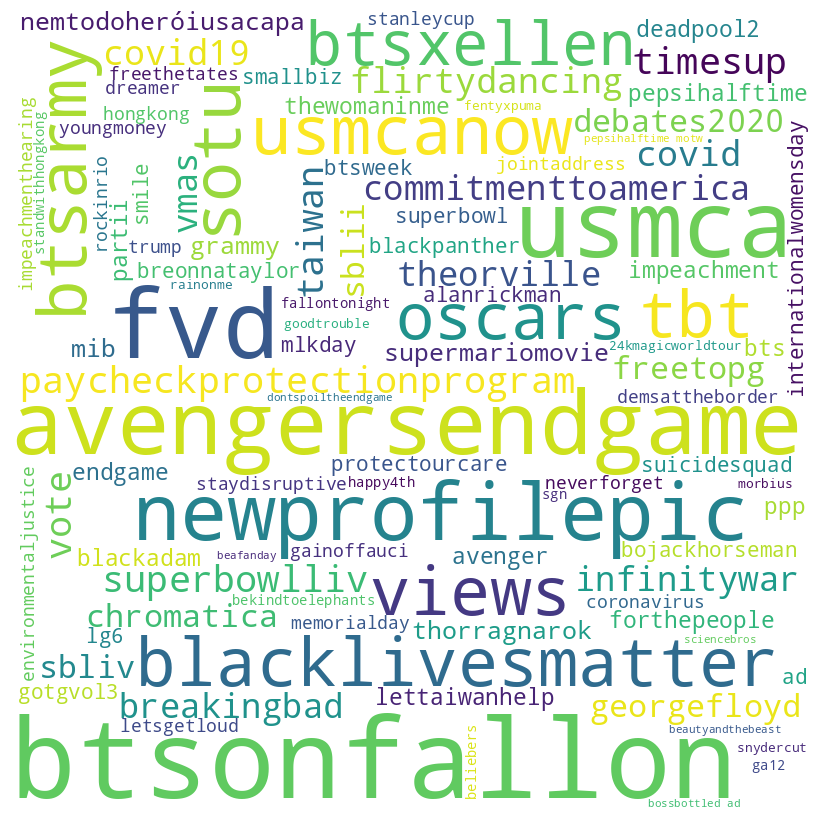

In [27]:
create_wordcloud(flat_hashtags_adult)

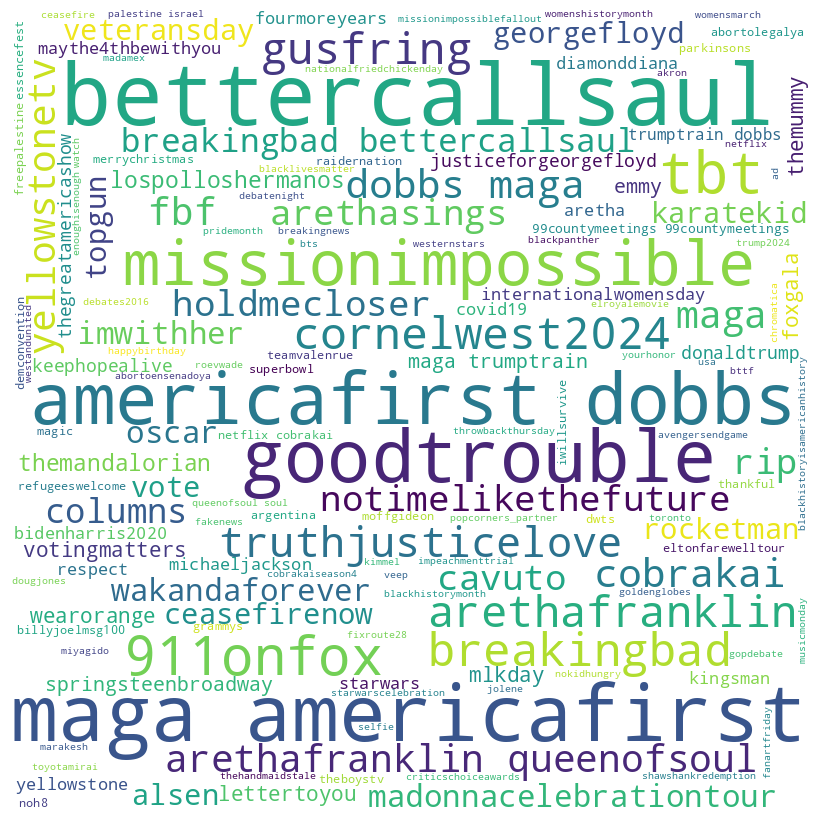

In [28]:
create_wordcloud(flat_hashtags_elderly)

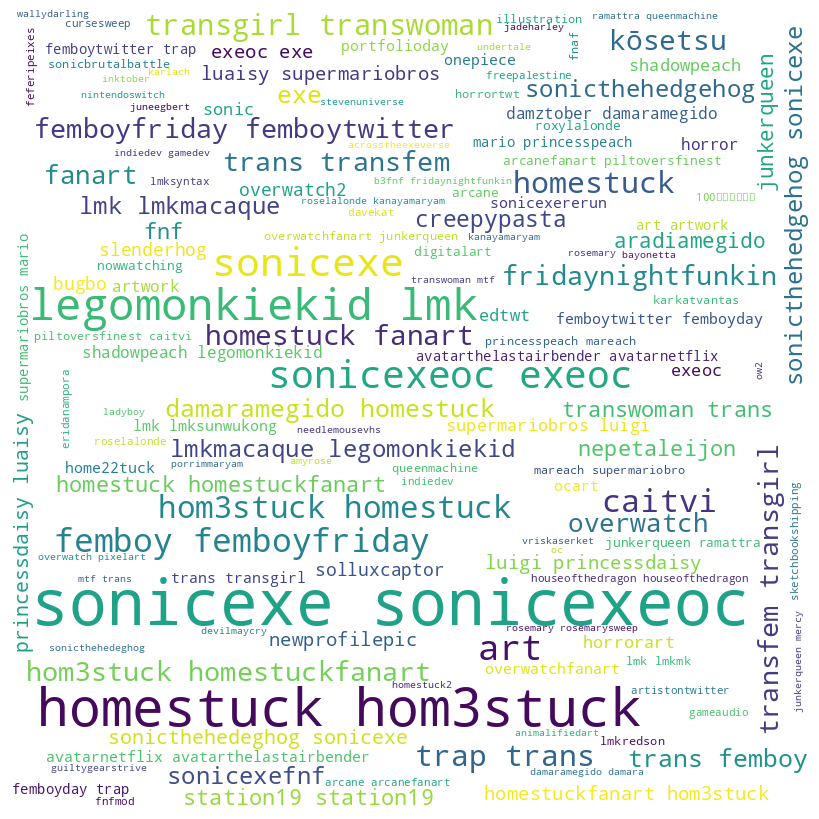

In [29]:
create_wordcloud(flat_hashtags_young)

## Used Emoji

In [30]:
def extract_emojis(text):
    if text is None:
        return ''
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

def process_emojis(df):
    df_emojis = pd.DataFrame()
    for column in df.columns:
        df_emojis[column + '_emojis'] = df[column].apply(extract_emojis)

    all_emojis = ''.join(row for row in df_emojis.apply(lambda x: ''.join(x), axis=1))
    emoji_counts = Counter(all_emojis)
    return emoji_counts

emoji_counts_adult = process_emojis(df_adult)
print('Adult Emoji: ', emoji_counts_adult)

emoji_counts_elderly = process_emojis(df_elderly)
print('Elderly Emoji: ', emoji_counts_elderly)

emoji_counts_young = process_emojis(df_young)
print('Young Emoji: ', emoji_counts_young)



Adult Emoji:  Counter({'😂': 2134, '🏼': 413, '🔥': 374, '❤': 309, '👩': 286, '🙏': 232, '✨': 221, '👦': 216, '🏆': 212, '💎': 203, '🏾': 198, '🤣': 196, '™': 195, '🤍': 172, '♥': 168, '♂': 159, '🏻': 154, '💪': 150, '👇': 132, '😭': 127, '🌹': 122, '⬇': 116, '🌈': 115, '🏳': 110, '⚔': 110, '🐍': 109, '💓': 108, '⭐': 105, '📚': 105, '💋': 103, '🎼': 103, '💄': 102, '🥊': 101, '➡': 101, '🎺': 101, '💧': 101, '👟': 100, '💬': 100, '🟧': 100, '🏔': 100, '🏍': 100, '🍁': 100, '🎦': 100, '🎙': 99, '🍉': 99, '🙅': 99, '🗝': 98, '🐻': 97, '😉': 96, '🎶': 95, '🔑': 94, '💥': 93, '🐈': 92, '🐟': 92, '🚀': 91, '🤡': 90, '🌚': 89, '💃': 88, '🌝': 88, '📩': 83, '💜': 80, '✝': 80, '🍳': 80, '®': 71, '🧰': 71, '🏽': 66, '🖤': 66, '💚': 63, '🎀': 62, '📈': 60, '✅': 58, '💻': 57, '💕': 57, '👒': 56, '👧': 56, '🙌': 50, '👏': 50, '😩': 49, '♀': 43, '🤦': 33, '🤷': 33, '❌': 32, '👑': 31, '⚡': 30, '😢': 30, '🤙': 30, '🗡': 30, '💔': 29, '🤔': 27, '😘': 27, '👍': 26, '🏿': 26, '👽': 26, '📷': 26, '🚨': 25, '👌': 21, '💛': 21, '🥺': 20, '✡': 19, '😍': 19, '▪': 19, '🥰': 19, '👊': 18, '💀': 1

### If you want to see the emojis inside the dataframe of that race.


In [31]:
df_emojis_adult = pd.DataFrame()
for column in df_adult.columns:
    df_emojis_adult[column + '_emojis'] = df_adult[column].apply(extract_emojis)
df_emojis_adult.head(10)

,name_emojis,startUrl_emojis,location_emojis,description_emojis,full_text_emojis
0,,,,,
1,,,,,
2,,,,,
3,,,,,
4,,,,,
5,,,,,
6,,,,,
7,,,,,
8,,,,,
9,,,,,


### Count of spesific emoji

In [32]:
specific_emoji = "🏴"
emoji_count = emoji_counts_adult.get(specific_emoji, 0)
print(f"Count of {specific_emoji}: {emoji_count}")

Count of 🏴: 1


## Removing emojis or encoding

In [33]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)

In [34]:
def preprocess_text(text):
    if text is None:
        return ''

    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    def replace_emoji(match):
        return " " + emoji.demojize(match.group(0)).replace(':', '') + " "

    text = re.sub(emoji_pattern, replace_emoji, text)
    text = ' '.join(text.split())
    return text

In [35]:
df_prep_elderly['cleaned_text'] = df_prep_elderly['full_text_processed'].apply(preprocess_text)
df_prep_adult['cleaned_text'] = df_prep_adult['full_text_processed'].apply(preprocess_text)
df_prep_young['cleaned_text'] = df_prep_young['full_text_processed'].apply(preprocess_text)



## Replace \\n with whitespace

In [36]:
def remove_newlines(df, column_name):
    df[column_name] = df[column_name].str.replace('\n', ' ')
    return df

df_prep_adult = remove_newlines(df_prep_adult, 'cleaned_text')
df_prep_elderly = remove_newlines(df_prep_elderly, 'cleaned_text')
df_prep_young = remove_newlines(df_prep_young, 'cleaned_text')


## Deleting extra whitespaces

In [37]:
def replace_multiple_spaces(df, column_name):
    df[column_name] = df[column_name].str.replace(r'\s+', ' ')
    return df

# Example usage
df_prep_adult = replace_multiple_spaces(df_prep_adult, 'cleaned_text')
df_prep_elderly = replace_multiple_spaces(df_prep_elderly, 'cleaned_text')
df_prep_young = replace_multiple_spaces(df_prep_young, 'cleaned_text')

df_prep_adult.head()

,name,startUrl,location,description,full_text_processed,cleaned_text
0,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,"Age 25.\n\nTired, unfulfilled, ground down by ...",age 25 tired unfulfilled ground down by the co...
1,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,I have a friend who is 40 and damn near a bill...,i have a friend who is 40 and damn near a bill...
2,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,You only need to know 3 things to understand f...,you only need to know 3 things to understand f...
3,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,"If you don't understand debt, you'll never be ...",if you dont understand debt youll never be tru...
4,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,Every night my husband and I do this one thing...,every night my husband and i do this one thing...


## Replace undurscore with whitespace

In [38]:
def remove_newlines(df, column_name):
    df[column_name] = df[column_name].str.replace('_', ' ')
    return df

df_prep_adult = remove_newlines(df_prep_adult, 'cleaned_text')
df_prep_elderly = remove_newlines(df_prep_elderly, 'cleaned_text')
df_prep_young = remove_newlines(df_prep_young, 'cleaned_text')


In [39]:
df_prep_adult.head()

,name,startUrl,location,description,full_text_processed,cleaned_text
0,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,"Age 25.\n\nTired, unfulfilled, ground down by ...",age 25 tired unfulfilled ground down by the co...
1,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,I have a friend who is 40 and damn near a bill...,i have a friend who is 40 and damn near a bill...
2,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,You only need to know 3 things to understand f...,you only need to know 3 things to understand f...
3,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,"If you don't understand debt, you'll never be ...",if you dont understand debt youll never be tru...
4,Codie Sanchez,Codie_Sanchez,Founder →,Investing millions in Main Street businesses &...,Every night my husband and I do this one thing...,every night my husband and i do this one thing...


## Showing rows with less than 3 characters

In [40]:
print(df_prep_adult.shape)
print(df_prep_young.shape)

(8397, 6)
(7017, 6)


In [41]:
def filter_dataframe(df):
    filtered_df = df[df['cleaned_text'].str.len() < 3]
    df = df.drop(filtered_df.index)
    return df

df_prep_adult = filter_dataframe(df_prep_adult)
df_prep_elderly = filter_dataframe(df_prep_elderly)
df_prep_young = filter_dataframe(df_prep_young)


In [42]:
print(df_prep_adult.shape)
print(df_prep_young.shape)

(8094, 6)
(6811, 6)


# Merge dataframes

In [43]:
df_prep_adult['age'] = 'adult'
df_prep_elderly['age'] = 'elderly'
df_prep_young['age'] = 'young'


In [44]:
print(df_prep_adult.shape)
print(df_prep_elderly.shape)
print(df_prep_young.shape)


(8094, 7)
(8175, 7)
(6811, 7)


In [45]:
df_merged = pd.concat([df_prep_adult, df_prep_elderly,df_prep_young,df_prep_young], ignore_index=True)
columns_to_drop = ['name', 'location', 'description','full_text_processed']
df_merged = df_merged.drop(columns=columns_to_drop)
print(df_merged.shape)
df_merged.head()

(29891, 3)


,startUrl,cleaned_text,age
0,Codie_Sanchez,age 25 tired unfulfilled ground down by the co...,adult
1,Codie_Sanchez,i have a friend who is 40 and damn near a bill...,adult
2,Codie_Sanchez,you only need to know 3 things to understand f...,adult
3,Codie_Sanchez,if you dont understand debt youll never be tru...,adult
4,Codie_Sanchez,every night my husband and i do this one thing...,adult


In [46]:
df_merged.tail()

,startUrl,cleaned_text,age
29886,PastelDollastic,chat get wild,young
29887,PastelDollastic,monkiekidnews im hungry for season 5 pls ok il...,young
29888,PastelDollastic,wukong n macaque crown shadowpeach,young
29889,PastelDollastic,might redraw this it old art aha,young
29890,PastelDollastic,macaque yes wukong i dont know if i can surviv...,young


# Advanced Methods for predicttion

efore applying BPE to the pre-training corpus of English Tweets, we tokenized these Tweets using TweetTokenizer from the NLTK toolkit and used the emoji package to translate emotion icons into text strings (here, each icon is referred to as a word token). We also normalized the Tweets by converting user mentions and web/url links into special tokens @USER and HTTPURL, respectively. Thus it is recommended to also apply the same pre-processing step for BERTweet-based downstream applications w.r.t. the raw input Tweets.

Given the raw input Tweets, to obtain the same pre-processing output, users could employ our TweetNormalizer module.

Installation: pip3 install nltk emoji==0.6.0
The emoji version must be either 0.5.4 or 0.6.0. Newer emoji versions have been updated to newer versions of the Emoji Charts, thus not consistent with the one used for pre-processing our pre-training Tweet corpus.

from TweetNormalizer import normalizeTweet


In [47]:
print(df_merged.isnull().sum())

startUrl        0
cleaned_text    0
age             0
dtype: int64


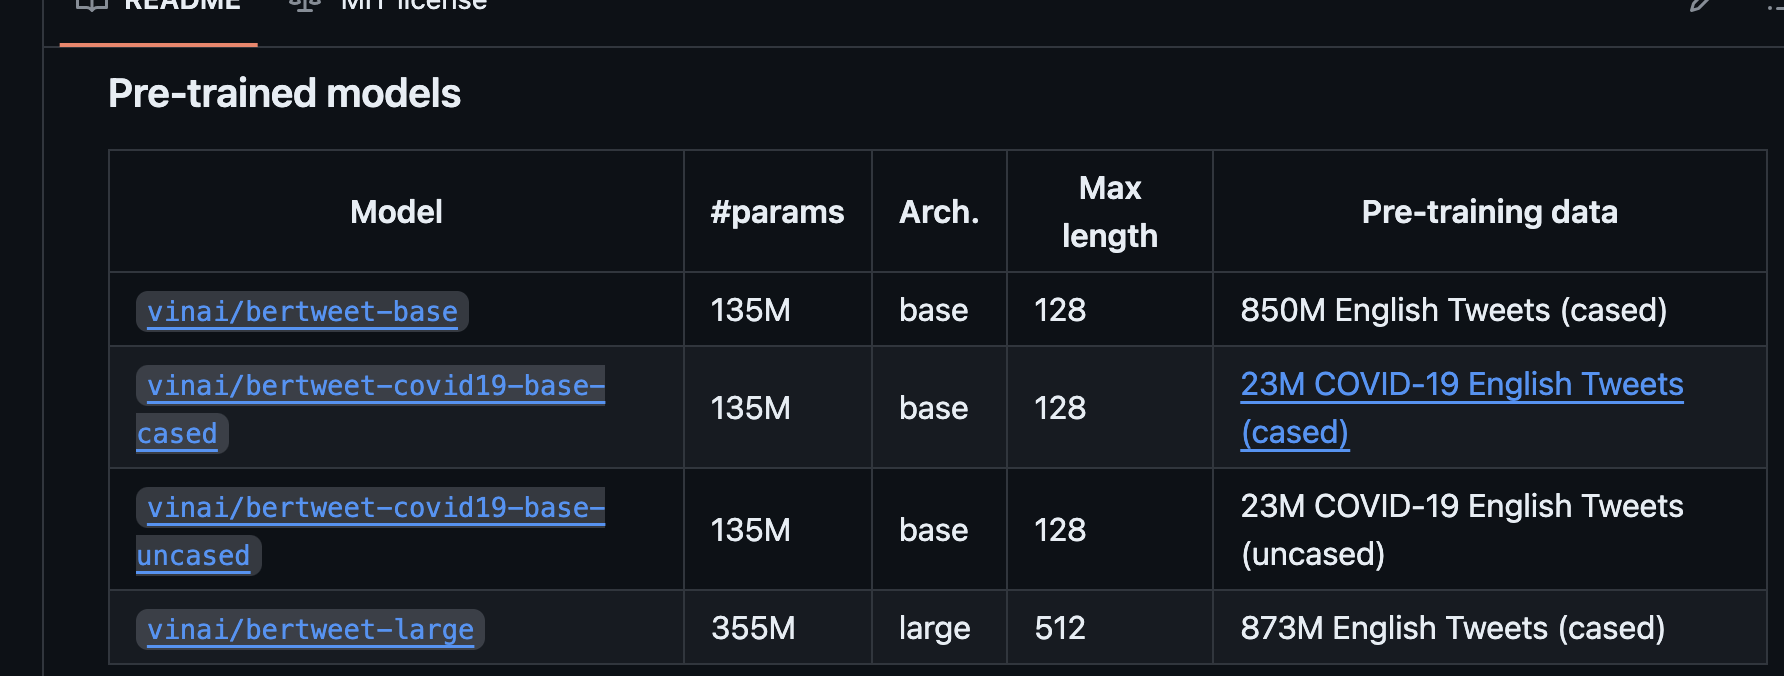

Install transformers with pip: pip install transformers, or install transformers from source.
Note that we merged a slow tokenizer for BERTweet into the main transformers branch. The process of merging a fast tokenizer for BERTweet is in the discussion, as mentioned in this pull request. If users would like to utilize the fast tokenizer, the users might install transformers as follows:
git clone --single-branch --branch fast_tokenizers_BARTpho_PhoBERT_BERTweet https://github.com/datquocnguyen/transformers.git
cd transformers
pip3 install -e .

In [48]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.6 MB/s eta 0:00:00


In [49]:
!pip install transformers
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split


In [50]:
model = AutoModel.from_pretrained("vinai/bertweet-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base", normalization=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

We employ the transformers library (Wolf
et al., 2019) to independently fine-tune BERTweet
for each task and each dataset in 30 training
epochs. We use AdamW (Loshchilov and Hutter, 2019) with a fixed learning rate of 1.e-5 and
a batch size of 32 (Liu et al., 2019). We compute
the task performance after each training epoch on
the validation set (here, we apply early stopping
when no improvement is observed after 5 continuous epochs)

each pre-trained language model the “soft” scores
are generally higher than the corresponding “hard”
scores, i.e. applying lexical normalization dictionaries to normalize word tokens in Tweets generally does not help improve the performance of the
pre-trained language models on downstream tasks

In [51]:
#dataset object that can be passed to a PyTorch DataLoader for batching and iterating over
#handles the tokenization and encoding of text inputs using the provided tokenizer
class CustomDataset(Dataset):

    def __init__(self, texts, targets, tokenizer, max_len):
        self.texts = texts
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx]) #ensure that the text is in a format that can be processed by the tokenizer.
        target = self.targets[idx]
        try:
            encoding = self.tokenizer.encode_plus(
            text, #This is the input text that we want to encode.
            add_special_tokens=True, #This parameter specifies that special tokens like [CLS] (start of sequence) and [SEP] (end of sequence) should be added to the input text. These tokens are required for RoBERTa.
            max_length=self.max_len, #f the input text is longer than this length, it will be truncated. If it is shorter, it will be padded.
            return_token_type_ids=None,  # DIfferent than bert, Make sure no token type IDs are returned as they are not required for RoBERTa
            padding='max_length',
            truncation=True,
            return_attention_mask=True,#The attention mask is a binary mask indicating which tokens are actual words and which are padding tokens.
            return_tensors='pt' #specifies that the output should be returned as PyTorch tensors ('pt').
            )

            return {
                'input_ids': encoding['input_ids'].flatten(),#token IDs of the input text.
                'attention_mask': encoding['attention_mask'].flatten(),# which indicates which tokens are real words and which are padding tokens.
                'targets': torch.tensor(target, dtype=torch.long) #integer
            }
        except KeyError as e:
            print(f"Index Error: {idx} not found.")
            raise


In [52]:
print(df_merged['age'].unique())
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_merged['age'] = le.fit_transform(df_merged['age'])

print(df_merged['age'].unique())

['adult' 'elderly' 'young']
[0 1 2]


In [53]:
from torch.nn.utils.rnn import pad_sequence
#combine a batch of samples into a single batch
def custom_collate_fn(batch):
  input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True) #pad the sequences to the same length.
  attention_masks = pad_sequence([item['attention_mask'] for item in batch], batch_first=True)#same as above but for the 'attention_mask'.
  targets = torch.stack([item['targets'] for item in batch]) #extracts the 'targets' from each item in the batch and then stacks them into a single tensor
  return {'input_ids': input_ids, 'attention_mask': attention_masks, 'targets': targets} #eturns a dictionary containing the padded input IDs, attention masks, and targets as a single batch

In [54]:
df_full_train, df_test = train_test_split(df_merged, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)


#80-10-10


df_train = df_train.reset_index(drop=True)#reset the index of a DataFrame, drop the old index and replace it with a new sequential index
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Best parameters from tuning
BATCH_SIZE = 16
LEARNING_RATE = 1e-5
DROPOUT_RATE = 0.2
WARMUP_STEPS = 0
MAX_LEN = 128

train_data = CustomDataset(df_train['cleaned_text'], df_train['age'], tokenizer, MAX_LEN)
val_data = CustomDataset(df_val['cleaned_text'], df_val['age'], tokenizer, MAX_LEN)
test_data = CustomDataset(df_test['cleaned_text'], df_test['age'], tokenizer, MAX_LEN)

#data loader batching automatically batches the data, which means it combines individual samples into batches
#GPUs can process batches of data faster than individual samples.
#shuffle for ensure that the model doesn't learn the order of the data
#DataLoader takes care of loading the data in parallel,
#collate_fn for if samples have different sizes or structures.
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate_fn)
val_dataloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate_fn)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate_fn)

In [55]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: cuda


In [56]:
from torch import nn
from torch.optim import Adam
from transformers import get_linear_schedule_with_warmup
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import optuna

with torch.no_grad():
    features = bertweet(input_ids)  # Models outputs are now tuples


https://github.com/VinAIResearch/BERTweet/blob/e36876c673438159de0233e9b1e9eee61d8902b3/README.md?plain=1#L78

In [57]:
EPOCHS = 100

In [58]:
class AgeClassifier(nn.Module):

    def __init__(self, n_classes, drop_rate=DROPOUT_RATE):
        super(AgeClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained("vinai/bertweet-base")
        self.drop = nn.Dropout(p=drop_rate)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes) #linear layer for the output with the number of classes

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        last_hidden_state = bert_output[0]
        pooled_output = last_hidden_state[:, 0]
        output = self.drop(pooled_output)
        return self.out(output)

n_classes = len(df_merged['age'].unique()) #4 races
model = AgeClassifier(n_classes)
model = model.to(device) #passed to gpu


#higher weights to the minority class
class_weights = compute_class_weight('balanced', classes=np.unique(df_train.age), y=df_train.age) #computed based on the class distribution in the training dataset
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=weights)#measures the performance of a classification model whose output is a probability value between 0 and 1
optimizer = Adam(model.parameters(), lr=LEARNING_RATE) # need  look at the paper for proper param

#will be used by step function
scheduler = get_linear_schedule_with_warmup( #prevent the model from diverging early on.
  optimizer,
  num_warmup_steps=WARMUP_STEPS,
  num_training_steps=len(train_dataloader) * EPOCHS
)

## Result

### Hyperparameter Tuning

In [ ]:
from transformers import AutoModel, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm


In [ ]:
def train_and_evaluate_model(trial, train_dataloader, val_dataloader, device, num_epochs, n_classes):
    # Define the hyperparameters
    learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-4, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64])
    warmup_steps = trial.suggest_int('warmup_steps', 0, 500)

    model = AgeClassifier(n_classes=n_classes, drop_rate=dropout_rate).to(device)

    optimizer = AdamW(model.parameters(), lr=learning_rate)
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=len(train_dataloader) * num_epochs
    )

    class_weights = compute_class_weight('balanced', classes=np.unique(df_train.age), y=df_train.age)
    weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)

    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        # Train
        model.train()
        for _, data in enumerate(tqdm(train_dataloader)):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            targets = data['targets'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()

        model.eval()
        val_loss = 0.0
        for _, data in enumerate(val_dataloader):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            targets = data['targets'].to(device)

            with torch.no_grad():
                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_dataloader)

        trial.report(avg_val_loss, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss

    return best_val_loss

In [ ]:
def objective(trial):
    max_len = 128
    train_dataset = CustomDataset(df_train['cleaned_text'], df_train['age'], tokenizer, max_len)
    val_dataset = CustomDataset(df_val['cleaned_text'], df_val['age'], tokenizer, max_len)

    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64])
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

    return train_and_evaluate_model(trial, train_dataloader, val_dataloader, device, num_epochs=3, n_classes=n_classes)


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

best_trial = study.best_trial
print(f"Best trial final loss value: {best_trial.value}")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")

[I 2024-06-04 23:45:29,264] A new study created in memory with name: no-name-002ba786-4b23-41f2-91f9-2a0ca88e849e
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 281/281 [01:30<00:00,  3.11it/s]
[I 2024-06-04 23:50:39,127] Trial 0 finished with value: 0.6159744145388298 and parameters: {'batch_size': 64, 'learning_rate': 6.49427135184061e-06, 'dropout_rate': 0.36334101827542287, 'warmup_steps': 326}. Best is trial 0 with value: 0.6159744145388298.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to

Best trial final loss value: 0.4874427946294374
batch_size: 16
learning_rate: 5.211714913822724e-05
dropout_rate: 0.12720540377979161
warmup_steps: 189


### Train part



Epoch: 1/100, Train Loss:  0.743
Train Accuracy: 67.65 %
Validation Loss: 0.613



Epoch: 2/100, Train Loss:  0.571
Train Accuracy: 76.82 %
Validation Loss: 0.535



Epoch: 3/100, Train Loss:  0.453
Train Accuracy: 82.64 %
Validation Loss: 0.536



Epoch: 4/100, Train Loss:  0.339
Train Accuracy: 87.83 %
Validation Loss: 0.518



Epoch: 5/100, Train Loss:  0.251
Train Accuracy: 91.50 %
Validation Loss: 0.565



Epoch: 6/100, Train Loss:  0.176
Train Accuracy: 94.44 %
Validation Loss: 0.634



Epoch: 7/100, Train Loss:  0.125
Train Accuracy: 96.12 %
Validation Loss: 0.692



Epoch: 8/100, Train Loss:  0.095
Train Accuracy: 97.12 %
Validation Loss: 0.721



Epoch: 9/100, Train Loss:  0.080
Train Accuracy: 97.65 %
Validation Loss: 0.779



Epoch: 10/100, Train Loss:  0.068
Train Accuracy: 97.95 %
Validation Loss: 0.764
Early stopping


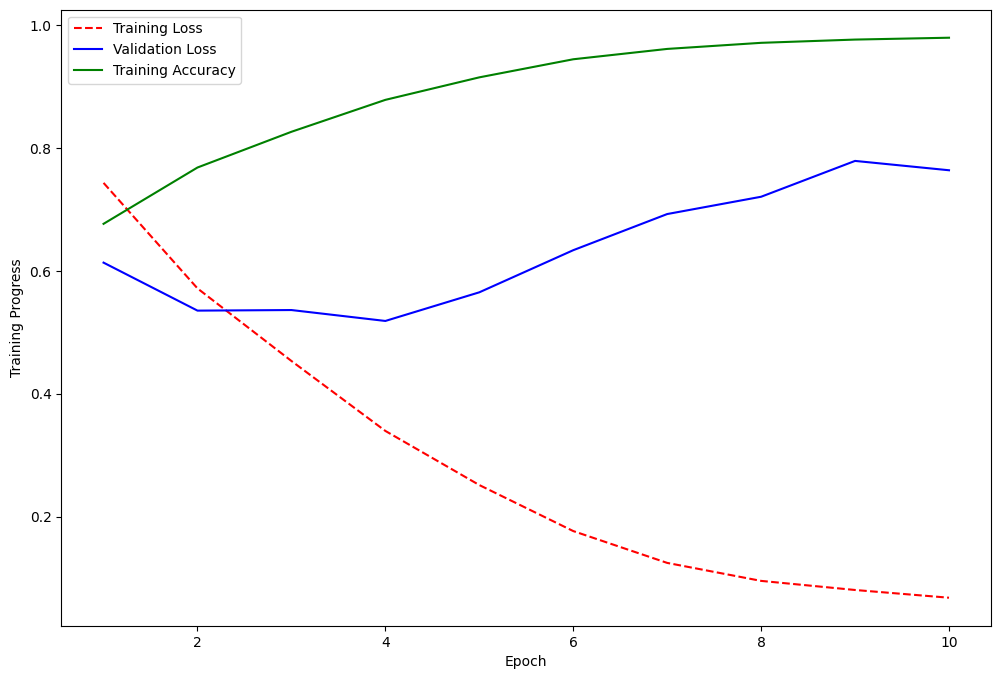

In [59]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

PATIENCE = 5  # number of epochs to wait before stopping, same as the paper berttweet

train_loss_values = []
val_loss_values = []
accuracy_values = []

best_loss = np.inf
patience_counter = 0

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    correct_predictions = 0
    total = 0

    for _, data in enumerate(tqdm(train_dataloader, desc=f'Epoch {epoch+1}/{EPOCHS}', leave=False)):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    average_train_loss = train_loss / len(train_dataloader)
    train_accuracy = correct_predictions / total

    train_loss_values.append(average_train_loss)
    accuracy_values.append(train_accuracy)

    print(f'\nEpoch: {epoch+1}/{EPOCHS}, Train Loss:  {average_train_loss:.3f}')
    print('Train Accuracy: {:.2f} %'.format(100 * train_accuracy))

    # Validation
    val_loss = 0
    model.eval()

    with torch.no_grad():
        for _, data in enumerate(val_dataloader):
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            labels = data['targets'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

    average_val_loss = val_loss / len(val_dataloader)
    val_loss_values.append(average_val_loss)
    print(f'Validation Loss: {average_val_loss:.3f}')

    # Check for early stopping
    if average_val_loss < best_loss:
        best_loss = average_val_loss
        patience_counter = 0  # Reset counter
        torch.save(model.state_dict(), 'best_model_age.pt')

    else:
        patience_counter += 1

    if patience_counter > PATIENCE:
        print("Early stopping")
        break

epoch_count = range(1, len(train_loss_values) + 1)
model.load_state_dict(torch.load('best_model_age.pt'))

plt.figure(figsize=(12, 8))
plt.plot(epoch_count, train_loss_values, 'r--')
plt.plot(epoch_count, val_loss_values, 'b-')
plt.plot(epoch_count, accuracy_values, 'g-')
plt.legend(['Training Loss', 'Validation Loss', 'Training Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training Progress')
plt.show();

### Test Part

In [60]:
import torch
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Your model evaluation code
model.eval()
test_loss = 0
correct_predictions = 0
total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for _, data in enumerate(test_dataloader):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['targets'].to(device)

        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

average_test_loss = test_loss / len(test_dataloader)
test_accuracy = correct_predictions / total
num_test_tweets = len(df_test)
incorrect_predictions = [(text, label, pred) for text, label, pred in zip(df_test['cleaned_text'], all_labels, all_predictions) if label != pred]

print(f'Number of tweets in the test set: {num_test_tweets}')
num_incorrect_predictions = len(incorrect_predictions)
print(f'Number of incorrect predictions: {num_incorrect_predictions}\n')
print(f'\nTest Loss: {average_test_loss:.3f}')
print('Test Accuracy: {:.2f} %'.format(100 * test_accuracy))

label_mapping = {0: 'adult', 1: 'elderly',2:'young'}
all_predictions_str = [label_mapping[pred] for pred in all_predictions]
all_labels_str = [label_mapping[label] for label in all_labels]

# Display incorrect predictions
incorrect_predictions = [(text, actual, pred) for text, actual, pred in zip(df_test['cleaned_text'], all_labels_str, all_predictions_str) if actual != pred]
print("\nIncorrect Predictions:")
for text, actual, pred in incorrect_predictions:
    print(f"Text: {text}\nActual: {actual}\nPredicted: {pred}\n")

# Calculate additional metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
classification_rep = classification_report(all_labels, all_predictions, target_names=list(label_mapping.values()))
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Number of tweets in the test set: 5979
Number of incorrect predictions: 1114


Test Loss: 0.531
Test Accuracy: 81.37 %

Incorrect Predictions:
Text: listen i can’t do miracles ok
Actual: adult
Predicted: young

Text: in some ways john was a highly complex person but in others he was a person who retained his innocence on one level he remained the kid he’d been in his home town thread 110
Actual: elderly
Predicted: adult

Text: get your couches ready for the premiere of thor love and thunder on disneyplus on september 8th disneyplusday
Actual: adult
Predicted: elderly

Text: if texas needed outside support to keep the biden parasites out would you ride in oncoming fist medium-light skin tonecowboy hat facelove-you gesture medium-light skin tone
Actual: adult
Predicted: elderly

Text: i sofa will create wormania my friend my best friend had got squashed by a broom horrible you humans will all pay you underestimate me i will take over tje world the soil will be mine
Actual: young
Predicte

## Test with unseen data

### Predicting the labels

In [62]:
model.load_state_dict(torch.load('best_model_age.pt', map_location=device))
model.eval()

def text_to_loader(tokenizer, texts, max_len):
    encoding = tokenizer(
        texts,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    return [{
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
    }]

def predict(model, dataloader):
    model = model.eval()
    predictions = []

    with torch.no_grad():
        for item in dataloader:
            input_ids = item['input_ids'].to(device)
            attention_mask = item['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds)

    return [le.inverse_transform([pred.item()])[0] for pred in predictions]  # Invert


In [63]:
unseen_texts = ["OMG, that party last night was lit!"] #i spend my time on screen predicted elderly
true_labels = ["young"]

MAX_LEN = 100
test_dataloader = DataLoader(text_to_loader(tokenizer, unseen_texts, MAX_LEN), batch_size=1)

predictions = predict(model, test_dataloader)

for text, true, pred in zip(unseen_texts, true_labels, predictions):
    print(f'Text: {text}')
    print(f'Predicted: {pred}, Actual: {true}\n')

Text: OMG, that party last night was lit!
Predicted: adult, Actual: young



### Giving probs for labels

In [64]:
def predict_probabilities(model, dataloader):
    model = model.eval()
    all_probs = []

    with torch.no_grad():
        for item in dataloader:
            input_ids = item['input_ids'].to(device)
            attention_mask = item['attention_mask'].to(device)
            outputs = model(input_ids, attention_mask)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            all_probs.append(probs)

    return all_probs


In [65]:
probabilities = predict_probabilities(model, test_dataloader)
unseen_texts = ["OMG, that party last night was lit!"]
true_labels = ["young"]

In [66]:
for text, true, probs in zip(unseen_texts, true_labels, probabilities):
    label_probs = {le.inverse_transform([i])[0]: prob.item() for i, prob in enumerate(probs[0])}
    print(f'Text: {text}')
    print(f'Label Probabilities: {label_probs}, Actual: {true}\n')

Text: OMG, that party last night was lit!
Label Probabilities: {'adult': 0.8021941781044006, 'elderly': 0.19094642996788025, 'young': 0.006859370972961187}, Actual: young



### Multiple sentence

In [67]:
# Sample sentences
sentences = [
#Young:

"I am young.",
"I am under 18 years old.",
"I am a teenager.",
"I am in my early twenties.",
"I am still in school.",
"I live with my parents/guardians.",
"I am exploring my interests and hobbies.",
"I am not yet financially independent.",
"I look forward to my future.",
"I am learning about the world around me.",
#Adult:

"I am an adult.",
"I am over 18 years old.",
"I have completed my education.",
"I am responsible for my own decisions.",
"I may be married or in a long-term relationship.",
"I am employed or seeking employment.",
"I pay my own bills and manage my finances.",
"I have goals and aspirations for the future.",
"I contribute to society in meaningful ways.",
"I am independent and self-sufficient.",
#Elderly:

"I am elderly.",
"I am over 65 years old.",
"I may be retired.",
"I have a lifetime of experiences.",
"I may face health challenges associated with aging.",
"I may live in a retirement community.",
"I enjoy spending time with my family and friends.",
"I have wisdom to share with younger generations.",
"I may require assistance with daily tasks.",
"I value my independence and autonomy."
]

# Corresponding expected races
expected_races = [
    "young", "young", "young", "young", "young", "young", "young", "young", "young", "young",
    "adult", "adult", "adult", "adult", "adult", "adult", "adult", "adult", "adult", "adult",
    "elderly", "elderly", "elderly", "elderly", "elderly", "elderly", "elderly", "elderly", "elderly", "elderly"

]

encoded_sentences = tokenizer(
    sentences,
    padding=True,
    truncation=True,
    return_tensors='pt',
    max_length=MAX_LEN,
)

input_ids = encoded_sentences["input_ids"].to(device)
attention_mask = encoded_sentences["attention_mask"].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    predictions = torch.argmax(outputs, dim=1)
    predictions = predictions.cpu().numpy()

predicted_labels = le.inverse_transform(predictions)
label_counts = {}
correct_counts = {}

for label in le.classes_:
    label_counts[label] = 0
    correct_counts[label] = 0

for pred, expected in zip(predicted_labels, expected_races):
    label_counts[expected] += 1
    if pred == expected:
        correct_counts[expected] += 1

print("True Prediction Ratios:")
for label in le.classes_:
    correct_predictions = correct_counts[label]
    total_predictions = label_counts[label]
    ratio = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
    print(f"{label}: {ratio:.2f}% (Total: {total_predictions}, Correct: {correct_predictions})")

print("\nIndividual Predictions:")

for i, (sentence, prediction, expected_race) in enumerate(zip(sentences, predicted_labels, expected_races)):
    print(f"Sentence {i+1}: '{sentence}'")
    print(f"Predicted: {prediction}, Expected: {expected_race}\n")


True Prediction Ratios:
adult: 80.00% (Total: 10, Correct: 8)
elderly: 40.00% (Total: 10, Correct: 4)
young: 0.00% (Total: 10, Correct: 0)

Individual Predictions:
Sentence 1: 'I am young.'
Predicted: adult, Expected: young

Sentence 2: 'I am under 18 years old.'
Predicted: adult, Expected: young

Sentence 3: 'I am a teenager.'
Predicted: adult, Expected: young

Sentence 4: 'I am in my early twenties.'
Predicted: elderly, Expected: young

Sentence 5: 'I am still in school.'
Predicted: elderly, Expected: young

Sentence 6: 'I live with my parents/guardians.'
Predicted: adult, Expected: young

Sentence 7: 'I am exploring my interests and hobbies.'
Predicted: elderly, Expected: young

Sentence 8: 'I am not yet financially independent.'
Predicted: adult, Expected: young

Sentence 9: 'I look forward to my future.'
Predicted: elderly, Expected: young

Sentence 10: 'I am learning about the world around me.'
Predicted: elderly, Expected: young

Sentence 11: 'I am an adult.'
Predicted: adult, E

In [68]:
sentences = [
	"tbh, i still show up to my home office a few times a week"
	"Memes are modern wisdom literature."
"People who love lists of mistakes are into errataca."
"He’s not really that dumb, right? No person of his reputation could possibly be that dumb. It must all be an act, right? Right? Right???"
]
#https://twitter.com/tunguz



encoded_sentences = tokenizer(
    sentences,
    padding=True,
    truncation=True,
    return_tensors='pt',
    max_length=MAX_LEN,
)

input_ids = encoded_sentences["input_ids"].to(device)
attention_mask = encoded_sentences["attention_mask"].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    predictions = torch.argmax(outputs, dim=1)
    predictions = predictions.cpu().numpy()

predicted_labels = le.inverse_transform(predictions)

expected_race = "adult" ####################################
expected_label = le.transform([expected_race])[0]

for i, prediction in enumerate(predicted_labels):
    actual_class = le.inverse_transform([expected_label])[0] if expected_label in predictions else expected_race
    print(f"Sentence {i+1}: '{sentences[i]}'")
    print(f"Predicted: {prediction}, Expected: {actual_class}\n")

Sentence 1: 'tbh, i still show up to my home office a few times a weekMemes are modern wisdom literature.People who love lists of mistakes are into errataca.He’s not really that dumb, right? No person of his reputation could possibly be that dumb. It must all be an act, right? Right? Right???'
Predicted: elderly, Expected: adult

